# Introduction to Famous Image Classifiers

Convolutional Neural Networks (CNNs) are a class of deep neural networks, most commonly applied to analyzing visual imagery. They have achieved remarkable success in various tasks such as image and video recognition, image classification, and also in medical image analysis.

## Data Processing

Before being fed into a CNN, data must undergo preprocessing to ensure it is in a suitable format for the model. This often includes normalization, where pixel values are scaled to a range (e.g., 0 to 1), and resizing, where images are resized to conform to the input size requirements of the network. Additionally, data augmentation techniques such as rotation, translation, and flipping can be used to increase the diversity of the training set, helping to improve the model's generalization.

## Models

CNNs consist of an input layer, output layer, and multiple hidden layers. The hidden layers of a CNN typically include convolutional layers, activation functions, pooling layers, and fully connected layers (FCLs). Below are some notable models:

### 1. Artificial Neural Network (ANN)

ANNs are the foundation upon which CNNs are built. They consist of layers of nodes connected by edges, with each edge having a weight that is adjusted during training. ANNs are versatile and can be used for a wide range of tasks beyond image processing.

### 2. LeNet

LeNet, one of the first convolutional neural networks, was designed for handwriting and character recognition. It consists of convolutional layers followed by subsampling layers, ending with fully connected layers.

### 3. VGG16

VGG16 is a deep CNN model that consists of 16 layers. It is characterized by its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Max pooling is used to reduce dimensionality and dense layers followed by a softmax activation function classify the inputs.

### 4. ResNet

Residual Networks (ResNet) introduced the concept of residual learning, where shortcut connections are used to allow gradients to flow through the network directly. This enables the training of much deeper networks by alleviating the vanishing gradient problem.

### 5. DenseNet

Dense Convolutional Network (DenseNet) connects each layer to every other layer in a feed-forward fashion. For each layer, the feature-maps of all preceding layers are used as inputs, and its own feature-maps are used as inputs into all subsequent layers, significantly reducing the number of parameters.

### 6. Inception/GoogLeNet

The Inception network, also known as GoogLeNet, introduced the inception module, which allows the network to choose from different kernel sizes at each layer, enabling it to adapt to various scales of features. It uses a complex architecture with multiple inception modules stacked upon each other, leading to a deep and wide structure.

## Loss Functions

Loss functions measure how well the model's predictions match the actual labels. For binary classification problems, Binary Cross-Entropy is used:

$$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$$

Where $y$ is the actual label, $\hat{y}$ is the predicted probability, and $N$ is the number of observations.

For multi-class classification problems involving $K$ classes, Cross-Entropy is the generalization:

$$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(\hat{y}_{ik})$$

Here, $y_{ik}$ is a binary indicator of whether class $k$ is the correct classification for observation $i$, and $\hat{y}_{ik}$ is the predicted probability that observation $i$ is of class $k$.

CNNs are powerful tools for many applications in computer vision and beyond, with ongoing research continuously improving their capabilities and efficiency.

## Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install codecarbon

In [ ]:
from codecarbon import EmissionsTracker

## Get Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_train.max(), x_train.min()

(255, 0)

## Visualize Data

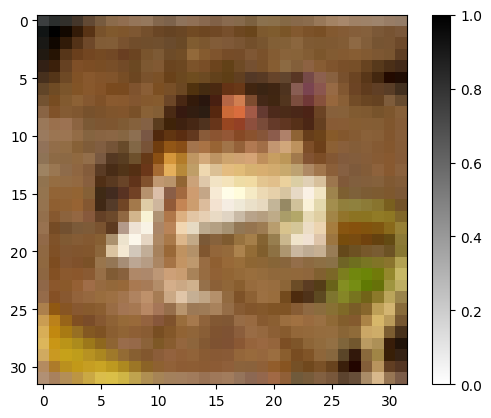

In [ ]:
i=0
plt.imshow(x_train[i], cmap='binary')
plt.colorbar()

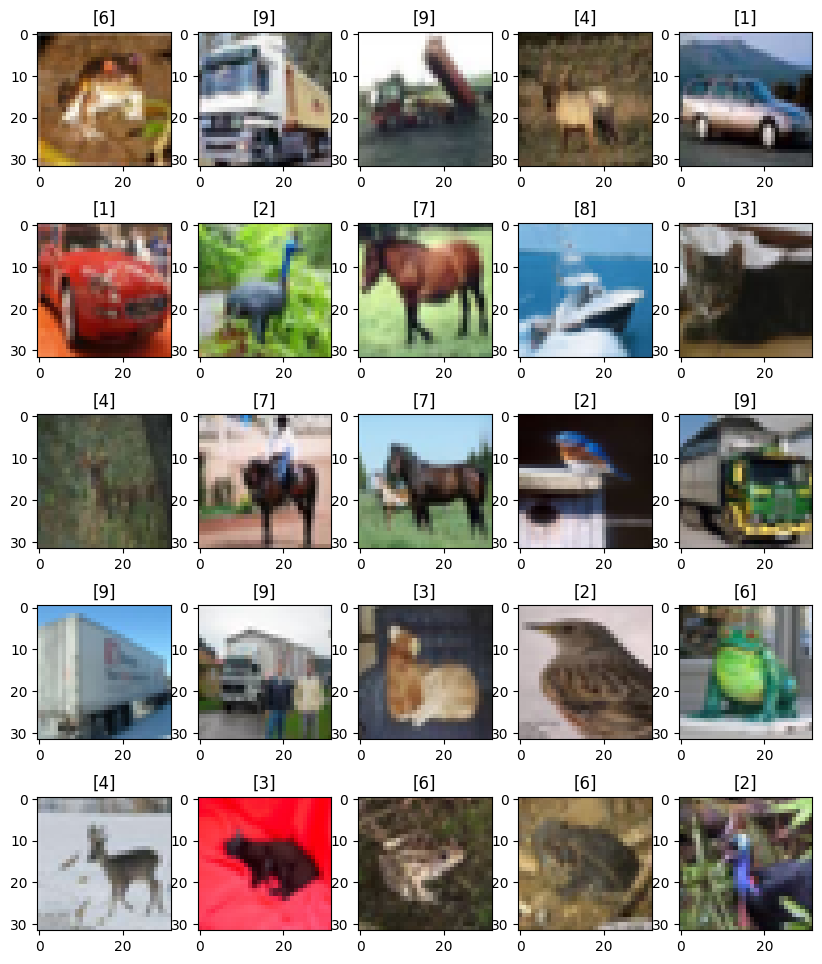

In [ ]:
plt.figure(figsize=(10, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='binary')
    plt.title(y_train[i])

plt.show()

## Data Processing

In [ ]:
y_train_bin = tf.keras.utils.to_categorical(y_train)
y_test_bin = tf.keras.utils.to_categorical(y_test)
y_train_bin.shape, y_test_bin.shape

((50000, 10), (10000, 10))

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

## Model 1: Neural Network

Artificial Neural Networks (ANNs) are computational models inspired by the human brain's interconnected network of neurons, designed to recognize patterns and solve complex problems. ANNs are composed of layers of nodes or "neurons," each of which can receive input, process it, and pass on the output to the next layer. The networks "learn" by adjusting the weights of the connections based on the errors in predictions during the training process. This allows ANNs to perform a wide range of tasks, from simple classification to speech and image recognition, by effectively capturing the underlying relationships in the input data.

The original paper by Yann LeCun that introduced convolutional neural networks (CNNs), a specialized kind of ANN for processing data with a grid-like topology (such as images), is titled "Gradient-Based Learning Applied to Document Recognition." Although this seminal work did not mark the inception of ANNs themselves, it significantly impacted the development and application of neural networks in image recognition and processing. You can access this influential paper through the arXiv link: [https://arxiv.org/abs/1102.0183](https://arxiv.org/abs/1102.0183).

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               786688    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 828490 (3.16 MB)
Trainable params: 828490 (3.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_train.shape, y_train_bin.shape

((50000, 32, 32, 3), (50000, 10))

In [ ]:
with tf.device(device_name):
    tracker = EmissionsTracker()
    tracker.start()

    model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=5
    )

    emissions: float = tracker.stop()
    print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 04:43:15] [setup] RAM Tracking...
[codecarbon INFO @ 04:43:15] [setup] GPU Tracking...
[codecarbon INFO @ 04:43:15] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:43:15] [setup] CPU Tracking...
[codecarbon WARNING @ 04:43:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:43:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:43:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:43:16] >>> Tracker's metadata:
[codecarbon INFO @ 04:43:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:43:16]   Python version: 3.10.12
[codecarbon INFO @ 04:43:16]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 04:43:16]   Available RAM : 50.994 GB
[codecarbon INFO @ 04:43:16]   CPU count: 8
[codecarbon INFO @ 04:43:16]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:43:16]   GPU c

Epoch 1/5
4000/4000 [==============================] - 13s 3ms/step - loss: 1.8719 - accuracy: 0.3160 - val_loss: 1.7289 - val_accuracy: 0.3820
Epoch 2/5
 262/4000 [>.............................] - ETA: 8s - loss: 1.7061 - accuracy: 0.3836

[codecarbon INFO @ 04:43:31] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:43:31] Energy consumed for all GPUs : 0.000125 kWh. Total GPU Power : 29.881096170151732 W
[codecarbon INFO @ 04:43:31] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:43:31] 0.000381 kWh of electricity used since the beginning.


4000/4000 [==============================] - 11s 3ms/step - loss: 1.6787 - accuracy: 0.3965 - val_loss: 1.6608 - val_accuracy: 0.4034
Epoch 3/5
2060/4000 [==============>...............] - ETA: 4s - loss: 1.6012 - accuracy: 0.4265

[codecarbon INFO @ 04:43:46] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:43:46] Energy consumed for all GPUs : 0.000251 kWh. Total GPU Power : 30.443200126817572 W
[codecarbon INFO @ 04:43:46] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:43:46] 0.000765 kWh of electricity used since the beginning.


4000/4000 [==============================] - 11s 3ms/step - loss: 1.5942 - accuracy: 0.4291 - val_loss: 1.6013 - val_accuracy: 0.4287
Epoch 4/5
3756/4000 [===========================>..] - ETA: 0s - loss: 1.5366 - accuracy: 0.4511

[codecarbon INFO @ 04:44:01] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:44:01] Energy consumed for all GPUs : 0.000379 kWh. Total GPU Power : 30.69081510388165 W


3777/4000 [===========================>..] - ETA: 0s - loss: 1.5362 - accuracy: 0.4513

[codecarbon INFO @ 04:44:01] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:44:01] 0.001149 kWh of electricity used since the beginning.


4000/4000 [==============================] - 11s 3ms/step - loss: 1.5376 - accuracy: 0.4501 - val_loss: 1.5499 - val_accuracy: 0.4497
Epoch 5/5
4000/4000 [==============================] - 11s 3ms/step - loss: 1.4960 - accuracy: 0.4637 - val_loss: 1.5915 - val_accuracy: 0.4359


[codecarbon INFO @ 04:44:14] Energy consumed for RAM : 0.000306 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:44:14] Energy consumed for all GPUs : 0.000486 kWh. Total GPU Power : 30.524706482953643 W
[codecarbon INFO @ 04:44:14] Energy consumed for all CPUs : 0.000680 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:44:14] 0.001471 kWh of electricity used since the beginning.


0.00 kg CO2eq


In [ ]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 1.5551 - accuracy: 0.4384


[1.55514395236969, 0.438400000333786]

## Model 2: LeNet

LeNet, developed by Yann LeCun and colleagues, is a pioneering convolutional neural network (CNN) designed for handwritten and machine-printed character recognition. It marks one of the first successful applications of CNNs, introducing a structured architecture that includes convolutional layers to extract features from input images, pooling layers to reduce spatial dimensions, and fully connected layers to perform classification. The architecture of LeNet was instrumental in demonstrating the effectiveness of deep learning for image processing tasks, significantly influencing the development of more complex and efficient neural networks in later years. This groundbreaking work laid the foundation for modern deep learning in computer vision. The original paper detailing LeNet, titled "Gradient-Based Learning Applied to Document Recognition," can be found on ArXiv through the link: [https://arxiv.org/abs/1102.0183](https://arxiv.org/abs/1102.0183).

Make sure that in Convolutional layer, you reshape the dimension.

In [ ]:
# x_train = x_train.reshape((60000, 32, 32, 1))
# x_test = x_test.reshape((10000, 32, 32, 1))
# x_train.shape, x_test.shape

Randomized filters:

![image](https://www.researchgate.net/publication/322816297/figure/fig2/AS:663481913200640@1535197823870/Visualizing-the-convolutional-filters-of-the-customized-model-AlexNet-VGG16-VGG19-in.png)

Existing filter:

![image](https://miro.medium.com/v2/resize:fit:2724/1*5caL4vgvVwojnUpM6i2_EQ.png)

Hand crafted filters:

![image](https://www.mdpi.com/electronics/electronics-11-01063/article_deploy/html/images/electronics-11-01063-g002.png)

I would recommend to write the layers using the following notations.

[[32, [5,5]], [16, [5,5]], 120, 84]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 84)               

In [ ]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
with tf.device(device_name):
    tracker = EmissionsTracker()
    tracker.start()

    model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=5
    )

    emissions: float = tracker.stop()
    print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 04:44:38] [setup] RAM Tracking...
[codecarbon INFO @ 04:44:38] [setup] GPU Tracking...
[codecarbon INFO @ 04:44:38] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:44:38] [setup] CPU Tracking...
[codecarbon WARNING @ 04:44:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:44:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:44:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:44:39] >>> Tracker's metadata:
[codecarbon INFO @ 04:44:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:44:39]   Python version: 3.10.12
[codecarbon INFO @ 04:44:39]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 04:44:39]   Available RAM : 50.994 GB
[codecarbon INFO @ 04:44:39]   CPU count: 8
[codecarbon INFO @ 04:44:39]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:44:39]   GPU c

Epoch 1/5
3984/4000 [============================>.] - ETA: 0s - loss: 1.7924 - accuracy: 0.3472

[codecarbon INFO @ 04:44:54] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:44:54] Energy consumed for all GPUs : 0.000125 kWh. Total GPU Power : 29.895364549352674 W
[codecarbon INFO @ 04:44:54] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:44:54] 0.000382 kWh of electricity used since the beginning.


4000/4000 [==============================] - 15s 3ms/step - loss: 1.7917 - accuracy: 0.3473 - val_loss: 1.5697 - val_accuracy: 0.4411
Epoch 2/5
4000/4000 [==============================] - 12s 3ms/step - loss: 1.4575 - accuracy: 0.4773 - val_loss: 1.3880 - val_accuracy: 0.5109
Epoch 3/5
 510/4000 [==>...........................] - ETA: 9s - loss: 1.3607 - accuracy: 0.5182

[codecarbon INFO @ 04:45:09] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122633934020996 W


 529/4000 [==>...........................] - ETA: 9s - loss: 1.3599 - accuracy: 0.5172

[codecarbon INFO @ 04:45:09] Energy consumed for all GPUs : 0.000250 kWh. Total GPU Power : 30.180872451390698 W
[codecarbon INFO @ 04:45:09] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:45:09] 0.000764 kWh of electricity used since the beginning.


4000/4000 [==============================] - 12s 3ms/step - loss: 1.3300 - accuracy: 0.5261 - val_loss: 1.2855 - val_accuracy: 0.5467
Epoch 4/5
1648/4000 [===========>..................] - ETA: 6s - loss: 1.2444 - accuracy: 0.5615

[codecarbon INFO @ 04:45:24] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:45:24] Energy consumed for all GPUs : 0.000377 kWh. Total GPU Power : 30.50098145178842 W
[codecarbon INFO @ 04:45:24] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:45:24] 0.001147 kWh of electricity used since the beginning.


4000/4000 [==============================] - 12s 3ms/step - loss: 1.2421 - accuracy: 0.5597 - val_loss: 1.3064 - val_accuracy: 0.5388
Epoch 5/5
2784/4000 [===================>..........] - ETA: 3s - loss: 1.1766 - accuracy: 0.5838

[codecarbon INFO @ 04:45:39] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:45:39] Energy consumed for all GPUs : 0.000504 kWh. Total GPU Power : 30.396831570095348 W
[codecarbon INFO @ 04:45:39] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:45:39] 0.001531 kWh of electricity used since the beginning.


4000/4000 [==============================] - 12s 3ms/step - loss: 1.1740 - accuracy: 0.5842 - val_loss: 1.1811 - val_accuracy: 0.5836


[codecarbon INFO @ 04:45:44] Energy consumed for RAM : 0.000344 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:45:44] Energy consumed for all GPUs : 0.000544 kWh. Total GPU Power : 30.264521380549443 W
[codecarbon INFO @ 04:45:44] Energy consumed for all CPUs : 0.000764 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:45:44] 0.001652 kWh of electricity used since the beginning.


0.00 kg CO2eq


In [ ]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 1.1829 - accuracy: 0.5794


[1.1828539371490479, 0.5794000029563904]

## Model 3: VGG16

It is taking the `conv2d` and `maxpooling` layers and make them repeat for a few more times.

![image](https://datagen.tech/wp-content/uploads/2022/11/image2-1.png)

VGG16 is a deep convolutional neural network architecture known for its simplicity and depth, developed by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) at the University of Oxford. Introduced in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition," VGG16 was notable for its uniform architecture consisting of 16 layers, including 13 convolutional layers followed by 3 fully connected layers. The network employs 3x3 convolutional filters throughout, a small receptive field size, but stacks many such layers deep to achieve high levels of representational power. VGG16 significantly advanced the field of deep learning by demonstrating that depth is a critical component for achieving good performance in visual recognition tasks. The model achieved state-of-the-art performance in the ImageNet competition, and its architecture has become a popular choice for many computer vision applications due to its simplicity and effectiveness. The original paper can be accessed through the ArXiv link: [https://arxiv.org/abs/1409.1556](https://arxiv.org/abs/1409.1556).

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()

# First convolutional block
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Second convolutional block
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Third convolutional block
#model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Fourth convolutional block
#model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Fifth convolutional block
#model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Flattening and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
#model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

[CodeCarbon](https://codecarbon.io/) Make sure you report whatever number from this package along with what CPU/GPU you are using.

In [ ]:
with tf.device(device_name):
    tracker = EmissionsTracker()
    tracker.start()

    model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=5
    )

    emissions: float = tracker.stop()
    print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 04:45:46] [setup] RAM Tracking...
[codecarbon INFO @ 04:45:46] [setup] GPU Tracking...
[codecarbon INFO @ 04:45:46] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:45:46] [setup] CPU Tracking...
[codecarbon WARNING @ 04:45:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:45:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:45:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:45:47] >>> Tracker's metadata:
[codecarbon INFO @ 04:45:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:45:47]   Python version: 3.10.12
[codecarbon INFO @ 04:45:47]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 04:45:47]   Available RAM : 50.994 GB
[codecarbon INFO @ 04:45:47]   CPU count: 8
[codecarbon INFO @ 04:45:47]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:45:47]   GPU c

Epoch 1/5
1303/4000 [========>.....................] - ETA: 24s - loss: 2.0427 - accuracy: 0.2610

[codecarbon INFO @ 04:46:02] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:46:02] Energy consumed for all GPUs : 0.000257 kWh. Total GPU Power : 61.67244208542755 W
[codecarbon INFO @ 04:46:02] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:46:02] 0.000514 kWh of electricity used since the beginning.


2941/4000 [=====================>........] - ETA: 9s - loss: 1.8368 - accuracy: 0.3381

[codecarbon INFO @ 04:46:17] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:46:17] Energy consumed for all GPUs : 0.000547 kWh. Total GPU Power : 69.57089888981143 W
[codecarbon INFO @ 04:46:17] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:46:17] 0.001060 kWh of electricity used since the beginning.


4000/4000 [==============================] - 41s 10ms/step - loss: 1.7437 - accuracy: 0.3726 - val_loss: 1.4140 - val_accuracy: 0.4929
Epoch 2/5
 313/4000 [=>............................] - ETA: 33s - loss: 1.3624 - accuracy: 0.5131

[codecarbon INFO @ 04:46:32] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:46:32] Energy consumed for all GPUs : 0.000835 kWh. Total GPU Power : 69.09687383930338 W
[codecarbon INFO @ 04:46:32] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:46:32] 0.001605 kWh of electricity used since the beginning.


1951/4000 [=============>................] - ETA: 18s - loss: 1.3416 - accuracy: 0.5190

[codecarbon INFO @ 04:46:47] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:46:47] Energy consumed for all GPUs : 0.001124 kWh. Total GPU Power : 69.60122378181562 W
[codecarbon INFO @ 04:46:47] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:46:47] 0.002151 kWh of electricity used since the beginning.


3583/4000 [=========================>....] - ETA: 3s - loss: 1.2898 - accuracy: 0.5397

[codecarbon INFO @ 04:47:02] Energy consumed for RAM : 0.000398 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:47:02] Energy consumed for all GPUs : 0.001415 kWh. Total GPU Power : 69.66723204142535 W
[codecarbon INFO @ 04:47:02] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:47:02] 0.002698 kWh of electricity used since the beginning.


4000/4000 [==============================] - 39s 10ms/step - loss: 1.2756 - accuracy: 0.5438 - val_loss: 1.1880 - val_accuracy: 0.5716
Epoch 3/5
 985/4000 [======>.......................] - ETA: 28s - loss: 1.0581 - accuracy: 0.6251

[codecarbon INFO @ 04:47:17] Energy consumed for RAM : 0.000478 kWh. RAM Power : 19.122633934020996 W


 991/4000 [======>.......................] - ETA: 27s - loss: 1.0567 - accuracy: 0.6256

[codecarbon INFO @ 04:47:17] Energy consumed for all GPUs : 0.001706 kWh. Total GPU Power : 70.02848672087813 W
[codecarbon INFO @ 04:47:17] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:47:17] 0.003247 kWh of electricity used since the beginning.


2610/4000 [==================>...........] - ETA: 12s - loss: 1.0331 - accuracy: 0.6326

[codecarbon INFO @ 04:47:32] Energy consumed for RAM : 0.000557 kWh. RAM Power : 19.122633934020996 W


2616/4000 [==================>...........] - ETA: 12s - loss: 1.0332 - accuracy: 0.6326

[codecarbon INFO @ 04:47:32] Energy consumed for all GPUs : 0.001996 kWh. Total GPU Power : 69.7149249027522 W
[codecarbon INFO @ 04:47:32] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:47:32] 0.003794 kWh of electricity used since the beginning.


4000/4000 [==============================] - 39s 10ms/step - loss: 1.0074 - accuracy: 0.6433 - val_loss: 1.0357 - val_accuracy: 0.6389
Epoch 4/5
  25/4000 [..............................] - ETA: 36s - loss: 0.8201 - accuracy: 0.7080

[codecarbon INFO @ 04:47:47] Energy consumed for RAM : 0.000637 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:47:47] Energy consumed for all GPUs : 0.002288 kWh. Total GPU Power : 70.06485633715619 W
[codecarbon INFO @ 04:47:47] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:47:47] 0.004342 kWh of electricity used since the beginning.


1657/4000 [===========>..................] - ETA: 21s - loss: 0.7841 - accuracy: 0.7217

[codecarbon INFO @ 04:48:02] Energy consumed for RAM : 0.000717 kWh. RAM Power : 19.122633934020996 W


1663/4000 [===========>..................] - ETA: 21s - loss: 0.7837 - accuracy: 0.7219

[codecarbon INFO @ 04:48:02] Energy consumed for all GPUs : 0.002578 kWh. Total GPU Power : 69.66089449897254 W
[codecarbon INFO @ 04:48:02] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:48:02] 0.004889 kWh of electricity used since the beginning.


3295/4000 [=======================>......] - ETA: 6s - loss: 0.7754 - accuracy: 0.7267

[codecarbon INFO @ 04:48:17] Energy consumed for RAM : 0.000796 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:48:17] Energy consumed for all GPUs : 0.002870 kWh. Total GPU Power : 70.04146820924521 W
[codecarbon INFO @ 04:48:17] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:48:17] 0.005437 kWh of electricity used since the beginning.


4000/4000 [==============================] - 39s 10ms/step - loss: 0.7730 - accuracy: 0.7273 - val_loss: 0.8911 - val_accuracy: 0.6913
Epoch 5/5
 709/4000 [====>.........................] - ETA: 30s - loss: 0.5116 - accuracy: 0.8267

[codecarbon INFO @ 04:48:32] Energy consumed for RAM : 0.000876 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:48:32] Energy consumed for all GPUs : 0.003160 kWh. Total GPU Power : 69.52121045425571 W
[codecarbon INFO @ 04:48:32] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:48:32] 0.005983 kWh of electricity used since the beginning.


2347/4000 [================>.............] - ETA: 15s - loss: 0.5236 - accuracy: 0.8195

[codecarbon INFO @ 04:48:47] Energy consumed for RAM : 0.000956 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:48:47] Energy consumed for all GPUs : 0.003452 kWh. Total GPU Power : 70.12335624395806 W
[codecarbon INFO @ 04:48:47] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:48:47] 0.006532 kWh of electricity used since the beginning.


3979/4000 [============================>.] - ETA: 0s - loss: 0.5306 - accuracy: 0.8161

[codecarbon INFO @ 04:49:02] Energy consumed for RAM : 0.001035 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:49:02] Energy consumed for all GPUs : 0.003741 kWh. Total GPU Power : 69.4827786295931 W
[codecarbon INFO @ 04:49:02] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:49:02] 0.007078 kWh of electricity used since the beginning.


4000/4000 [==============================] - 39s 10ms/step - loss: 0.5308 - accuracy: 0.8160 - val_loss: 0.8842 - val_accuracy: 0.7053


[codecarbon INFO @ 04:49:04] Energy consumed for RAM : 0.001047 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:49:04] Energy consumed for all GPUs : 0.003784 kWh. Total GPU Power : 71.06480368644942 W
[codecarbon INFO @ 04:49:04] Energy consumed for all CPUs : 0.002328 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:49:04] 0.007159 kWh of electricity used since the beginning.


0.00 kg CO2eq


In [ ]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 2s 4ms/step - loss: 0.9033 - accuracy: 0.6932


[0.9033156037330627, 0.6931999921798706]

### Track CO2 Emission (Optional)

For more details, refer [here](https://codecarbon.io/).

In [ ]:
from codecarbon import EmissionsTracker

In [ ]:
with tf.device(device_name):
    tracker = EmissionsTracker()
    tracker.start()

    model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=1
    )

    emissions: float = tracker.stop()
    print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 04:49:06] [setup] RAM Tracking...
[codecarbon INFO @ 04:49:06] [setup] GPU Tracking...
[codecarbon INFO @ 04:49:06] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:49:06] [setup] CPU Tracking...
[codecarbon WARNING @ 04:49:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:49:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:49:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:49:07] >>> Tracker's metadata:
[codecarbon INFO @ 04:49:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:49:07]   Python version: 3.10.12
[codecarbon INFO @ 04:49:07]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 04:49:07]   Available RAM : 50.994 GB
[codecarbon INFO @ 04:49:07]   CPU count: 8
[codecarbon INFO @ 04:49:07]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:49:07]   GPU c

1456/4000 [=========>....................] - ETA: 23s - loss: 0.2623 - accuracy: 0.9135

[codecarbon INFO @ 04:49:23] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:49:23] Energy consumed for all GPUs : 0.000276 kWh. Total GPU Power : 66.13694160697779 W
[codecarbon INFO @ 04:49:23] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:49:23] 0.000532 kWh of electricity used since the beginning.


3082/4000 [======================>.......] - ETA: 8s - loss: 0.2863 - accuracy: 0.9034

[codecarbon INFO @ 04:49:38] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:49:38] Energy consumed for all GPUs : 0.000565 kWh. Total GPU Power : 69.55040730258807 W
[codecarbon INFO @ 04:49:38] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:49:38] 0.001079 kWh of electricity used since the beginning.


4000/4000 [==============================] - 39s 10ms/step - loss: 0.2946 - accuracy: 0.8996 - val_loss: 1.1340 - val_accuracy: 0.6764


[codecarbon INFO @ 04:49:49] Energy consumed for RAM : 0.000217 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:49:49] Energy consumed for all GPUs : 0.000772 kWh. Total GPU Power : 69.00352903900216 W
[codecarbon INFO @ 04:49:49] Energy consumed for all CPUs : 0.000482 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:49:49] 0.001471 kWh of electricity used since the beginning.


0.00 kg CO2eq


## Model 4: ResNet

[Link](https://arxiv.org/pdf/1512.03385.pdf)

![image](https://production-media.paperswithcode.com/methods/resnet-e1548261477164_2_mD02h5A.png)

ResNet, short for Residual Network, is a revolutionary neural network architecture that introduced the concept of residual learning to facilitate the training of much deeper networks. Developed by Kaiming He and colleagues, ResNet was designed to solve the problem of vanishing gradients by using shortcut connections that perform identity mapping, allowing layers to learn residual functions with reference to the layer inputs. This architecture enables the network to be significantly deeper—up to hundreds or even thousands of layers—while still being trainable and achieving outstanding performance. ResNet's effectiveness was demonstrated by its winning entry in the 2015 ImageNet Large Scale Visual Recognition Challenge (ILSVRC), setting new records in classification, detection, and localization tasks. The original paper, "Deep Residual Learning for Image Recognition," details the development and achievements of ResNet and has had a profound impact on the design of deep neural networks for computer vision and beyond. The paper can be found on ArXiv: [https://arxiv.org/abs/1512.03385](https://arxiv.org/abs/1512.03385).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model

In [ ]:
def identity_block(input_tensor, kernel_size, filters):
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1))(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1))(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x

def conv_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1))(x)
    x = layers.BatchNormalization()(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet50(input_shape=(224, 224, 3), num_classes=1000):
    input_tensor = Input(shape=input_shape)

    # Initial convolution layer
    x = layers.ZeroPadding2D(padding=(3, 3))(input_tensor)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.ZeroPadding2D(padding=(1, 1))(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Residual blocks

    x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])

    x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])

    x = conv_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])

    #x = conv_block(x, 3, [256, 256, 1024])
    #x = identity_block(x, 3, [256, 256, 1024])
    #x = identity_block(x, 3, [256, 256, 1024])
    #x = identity_block(x, 3, [256, 256, 1024])
    #x = identity_block(x, 3, [256, 256, 1024])

    #x = conv_block(x, 3, [512, 512, 2048])
    #x = identity_block(x, 3, [512, 512, 2048])
    #x = identity_block(x, 3, [512, 512, 2048])

    # Final part
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(input_tensor, x)

    return model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [ ]:
model = build_resnet50(input_shape=(32, 32, 3), num_classes=10)

In [ ]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
with tf.device(device_name):
    tracker = EmissionsTracker()
    tracker.start()

    model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=5
    )

    emissions: float = tracker.stop()
    print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 04:49:49] [setup] RAM Tracking...
[codecarbon INFO @ 04:49:49] [setup] GPU Tracking...
[codecarbon INFO @ 04:49:49] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:49:49] [setup] CPU Tracking...
[codecarbon WARNING @ 04:49:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:49:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:49:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:49:51] >>> Tracker's metadata:
[codecarbon INFO @ 04:49:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:49:51]   Python version: 3.10.12
[codecarbon INFO @ 04:49:51]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 04:49:51]   Available RAM : 50.994 GB
[codecarbon INFO @ 04:49:51]   CPU count: 8
[codecarbon INFO @ 04:49:51]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:49:51]   GPU c

Epoch 1/5
 316/4000 [=>............................] - ETA: 58s - loss: 2.4589 - accuracy: 0.1750

[codecarbon INFO @ 04:50:06] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:50:06] Energy consumed for all GPUs : 0.000159 kWh. Total GPU Power : 38.25664001494219 W
[codecarbon INFO @ 04:50:06] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:50:06] 0.000416 kWh of electricity used since the beginning.


1245/4000 [========>.....................] - ETA: 44s - loss: 2.1379 - accuracy: 0.2652

[codecarbon INFO @ 04:50:21] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:50:21] Energy consumed for all GPUs : 0.000332 kWh. Total GPU Power : 41.35372831069146 W
[codecarbon INFO @ 04:50:21] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:50:21] 0.000845 kWh of electricity used since the beginning.


2185/4000 [===============>..............] - ETA: 29s - loss: 2.0089 - accuracy: 0.3022

[codecarbon INFO @ 04:50:36] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.122633934020996 W


2189/4000 [===============>..............] - ETA: 29s - loss: 2.0088 - accuracy: 0.3024

[codecarbon INFO @ 04:50:36] Energy consumed for all GPUs : 0.000508 kWh. Total GPU Power : 42.34538374476142 W
[codecarbon INFO @ 04:50:36] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:50:36] 0.001278 kWh of electricity used since the beginning.


3116/4000 [======================>.......] - ETA: 14s - loss: 1.9105 - accuracy: 0.3363

[codecarbon INFO @ 04:50:51] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.122633934020996 W


3120/4000 [======================>.......] - ETA: 14s - loss: 1.9105 - accuracy: 0.3363

[codecarbon INFO @ 04:50:51] Energy consumed for all GPUs : 0.000684 kWh. Total GPU Power : 42.23063093616872 W
[codecarbon INFO @ 04:50:51] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:50:51] 0.001711 kWh of electricity used since the beginning.


3998/4000 [============================>.] - ETA: 0s - loss: 1.8384 - accuracy: 0.3590

[codecarbon INFO @ 04:51:06] Energy consumed for RAM : 0.000398 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:51:06] Energy consumed for all GPUs : 0.000861 kWh. Total GPU Power : 42.54777125062003 W
[codecarbon INFO @ 04:51:06] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:51:06] 0.002145 kWh of electricity used since the beginning.


4000/4000 [==============================] - 77s 17ms/step - loss: 1.8385 - accuracy: 0.3590 - val_loss: 1.5009 - val_accuracy: 0.4645
Epoch 2/5
 731/4000 [====>.........................] - ETA: 52s - loss: 1.4854 - accuracy: 0.4707

[codecarbon INFO @ 04:51:21] Energy consumed for RAM : 0.000478 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:51:21] Energy consumed for all GPUs : 0.001049 kWh. Total GPU Power : 45.108045627232144 W
[codecarbon INFO @ 04:51:21] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:51:21] 0.002589 kWh of electricity used since the beginning.


1670/4000 [===========>..................] - ETA: 37s - loss: 1.4616 - accuracy: 0.4814

[codecarbon INFO @ 04:51:36] Energy consumed for RAM : 0.000558 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:51:36] Energy consumed for all GPUs : 0.001230 kWh. Total GPU Power : 43.41397622530666 W
[codecarbon INFO @ 04:51:36] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:51:36] 0.003027 kWh of electricity used since the beginning.


2605/4000 [==================>...........] - ETA: 22s - loss: 1.4348 - accuracy: 0.4918

[codecarbon INFO @ 04:51:51] Energy consumed for RAM : 0.000637 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:51:51] Energy consumed for all GPUs : 0.001411 kWh. Total GPU Power : 43.3817571615307 W
[codecarbon INFO @ 04:51:51] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:51:51] 0.003464 kWh of electricity used since the beginning.


3532/4000 [=========================>....] - ETA: 7s - loss: 1.4125 - accuracy: 0.5011

[codecarbon INFO @ 04:52:06] Energy consumed for RAM : 0.000717 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:52:06] Energy consumed for all GPUs : 0.001588 kWh. Total GPU Power : 42.54001618329976 W
[codecarbon INFO @ 04:52:06] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:52:06] 0.003898 kWh of electricity used since the beginning.


4000/4000 [==============================] - 67s 17ms/step - loss: 1.4012 - accuracy: 0.5060 - val_loss: 1.3733 - val_accuracy: 0.5294
Epoch 3/5
 271/4000 [=>............................] - ETA: 59s - loss: 1.2274 - accuracy: 0.5764

[codecarbon INFO @ 04:52:21] Energy consumed for RAM : 0.000796 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:52:21] Energy consumed for all GPUs : 0.001773 kWh. Total GPU Power : 44.41899329203077 W
[codecarbon INFO @ 04:52:21] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:52:21] 0.004340 kWh of electricity used since the beginning.


1184/4000 [=======>......................] - ETA: 46s - loss: 1.2056 - accuracy: 0.5791

[codecarbon INFO @ 04:52:36] Energy consumed for RAM : 0.000876 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:52:36] Energy consumed for all GPUs : 0.001951 kWh. Total GPU Power : 42.72521327952776 W
[codecarbon INFO @ 04:52:36] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:52:36] 0.004775 kWh of electricity used since the beginning.


2121/4000 [==============>...............] - ETA: 30s - loss: 1.1890 - accuracy: 0.5842

[codecarbon INFO @ 04:52:51] Energy consumed for RAM : 0.000956 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:52:51] Energy consumed for all GPUs : 0.002130 kWh. Total GPU Power : 43.006228665107834 W
[codecarbon INFO @ 04:52:51] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:52:51] 0.005210 kWh of electricity used since the beginning.


3039/4000 [=====================>........] - ETA: 15s - loss: 1.1761 - accuracy: 0.5867

[codecarbon INFO @ 04:53:06] Energy consumed for RAM : 0.001035 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:53:06] Energy consumed for all GPUs : 0.002308 kWh. Total GPU Power : 42.80333945597996 W
[codecarbon INFO @ 04:53:06] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:53:06] 0.005645 kWh of electricity used since the beginning.


3905/4000 [============================>.] - ETA: 1s - loss: 1.1657 - accuracy: 0.5911

[codecarbon INFO @ 04:53:21] Energy consumed for RAM : 0.001115 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:53:21] Energy consumed for all GPUs : 0.002484 kWh. Total GPU Power : 42.09754127052989 W
[codecarbon INFO @ 04:53:21] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:53:21] 0.006077 kWh of electricity used since the beginning.


4000/4000 [==============================] - 69s 17ms/step - loss: 1.1664 - accuracy: 0.5909 - val_loss: 1.1163 - val_accuracy: 0.6118
Epoch 4/5
 582/4000 [===>..........................] - ETA: 58s - loss: 1.0378 - accuracy: 0.6373

[codecarbon INFO @ 04:53:36] Energy consumed for RAM : 0.001195 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:53:36] Energy consumed for all GPUs : 0.002664 kWh. Total GPU Power : 43.407637928172136 W
[codecarbon INFO @ 04:53:36] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:53:36] 0.006515 kWh of electricity used since the beginning.


1432/4000 [=========>....................] - ETA: 44s - loss: 1.0320 - accuracy: 0.6409

[codecarbon INFO @ 04:53:51] Energy consumed for RAM : 0.001274 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:53:51] Energy consumed for all GPUs : 0.002836 kWh. Total GPU Power : 41.19789136591903 W
[codecarbon INFO @ 04:53:51] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:53:51] 0.006943 kWh of electricity used since the beginning.


2320/4000 [================>.............] - ETA: 28s - loss: 1.0171 - accuracy: 0.6445

[codecarbon INFO @ 04:54:06] Energy consumed for RAM : 0.001354 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:54:06] Energy consumed for all GPUs : 0.003011 kWh. Total GPU Power : 42.08161398186389 W
[codecarbon INFO @ 04:54:06] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:54:06] 0.007375 kWh of electricity used since the beginning.


3247/4000 [=======================>......] - ETA: 12s - loss: 1.0078 - accuracy: 0.6480

[codecarbon INFO @ 04:54:21] Energy consumed for RAM : 0.001434 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:54:21] Energy consumed for all GPUs : 0.003191 kWh. Total GPU Power : 43.25826918112112 W
[codecarbon INFO @ 04:54:21] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:54:21] 0.007812 kWh of electricity used since the beginning.


3997/4000 [============================>.] - ETA: 0s - loss: 1.0048 - accuracy: 0.6490

[codecarbon INFO @ 04:54:36] Energy consumed for RAM : 0.001513 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:54:36] Energy consumed for all GPUs : 0.003372 kWh. Total GPU Power : 43.40777919800419 W
[codecarbon INFO @ 04:54:36] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:54:36] 0.008250 kWh of electricity used since the beginning.


4000/4000 [==============================] - 71s 18ms/step - loss: 1.0047 - accuracy: 0.6491 - val_loss: 1.1316 - val_accuracy: 0.6149
Epoch 5/5
 883/4000 [=====>........................] - ETA: 50s - loss: 0.8615 - accuracy: 0.6943

[codecarbon INFO @ 04:54:51] Energy consumed for RAM : 0.001593 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:54:51] Energy consumed for all GPUs : 0.003553 kWh. Total GPU Power : 43.38680735096965 W
[codecarbon INFO @ 04:54:51] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:54:51] 0.008687 kWh of electricity used since the beginning.


1788/4000 [============>.................] - ETA: 36s - loss: 0.8742 - accuracy: 0.6923

[codecarbon INFO @ 04:55:06] Energy consumed for RAM : 0.001672 kWh. RAM Power : 19.122633934020996 W


1792/4000 [============>.................] - ETA: 36s - loss: 0.8747 - accuracy: 0.6922

[codecarbon INFO @ 04:55:06] Energy consumed for all GPUs : 0.003730 kWh. Total GPU Power : 42.524728864361514 W
[codecarbon INFO @ 04:55:06] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:55:06] 0.009121 kWh of electricity used since the beginning.


2715/4000 [===================>..........] - ETA: 21s - loss: 0.8826 - accuracy: 0.6909

[codecarbon INFO @ 04:55:21] Energy consumed for RAM : 0.001752 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:55:21] Energy consumed for all GPUs : 0.003907 kWh. Total GPU Power : 42.49220178143257 W
[codecarbon INFO @ 04:55:21] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:55:21] 0.009554 kWh of electricity used since the beginning.


3631/4000 [==========================>...] - ETA: 6s - loss: 0.8794 - accuracy: 0.6911

[codecarbon INFO @ 04:55:36] Energy consumed for RAM : 0.001832 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:55:36] Energy consumed for all GPUs : 0.004087 kWh. Total GPU Power : 43.107932988943055 W
[codecarbon INFO @ 04:55:36] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:55:36] 0.009991 kWh of electricity used since the beginning.


4000/4000 [==============================] - 69s 17ms/step - loss: 0.8808 - accuracy: 0.6903 - val_loss: 1.0118 - val_accuracy: 0.6534


[codecarbon INFO @ 04:55:45] Energy consumed for RAM : 0.001881 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:55:45] Energy consumed for all GPUs : 0.004202 kWh. Total GPU Power : 45.02913839357372 W
[codecarbon INFO @ 04:55:45] Energy consumed for all CPUs : 0.004181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:55:45] 0.010264 kWh of electricity used since the beginning.


0.01 kg CO2eq


In [ ]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [ ]:
# with tf.device(device_name):
#     model.fit(
#         x=x_train,
#         y=y_train_bin,
#         batch_size=10,
#         validation_split=0.2,
#         epochs=5
#     )

```py
model = None
model.compile
model.fit(epochs=1)
model.save("tmp.h5")

while error > 0.1:
    model = tf.keras.models.load_model("tmp.h5")
    model.fit(epochs=1)
    model.save("tmp.h5")
    error = None
```

In [ ]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 3s 5ms/step - loss: 1.0244 - accuracy: 0.6512


[1.0243779420852661, 0.651199996471405]

## Model 5: DenseNet

In one sentence, DenseNet is ResNet skipping at *every* layer.

![image](https://pytorch.org/assets/images/densenet1.png)

DenseNet, short for Densely Connected Convolutional Networks, is a deep neural network architecture that innovates on the way layers communicate with each other. Introduced by Gao Huang, Zhuang Liu, Laurens van der Maaten, and Kilian Q. Weinberger, DenseNet improves upon traditional convolutional networks by connecting each layer directly to every other layer in a feed-forward fashion. In a DenseNet, each layer receives the feature maps from all preceding layers as inputs and passes its own feature maps to all subsequent layers, leading to a highly dense connectivity pattern. This architecture significantly reduces the number of parameters, alleviates the vanishing gradient problem, encourages feature reuse, and substantially decreases the risk of overfitting. DenseNet has demonstrated remarkable performance on a variety of visual recognition tasks, setting new benchmarks for accuracy and efficiency. The original paper, "Densely Connected Convolutional Networks," provides a comprehensive overview of the DenseNet architecture and its benefits. The paper can be accessed on ArXiv: [https://arxiv.org/abs/1608.06993](https://arxiv.org/abs/1608.06993).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

In [ ]:
def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        output = layers.BatchNormalization()(x)
        output = layers.Activation('relu')(output)
        output = layers.Conv2D(4 * growth_rate, (1, 1), padding='same', kernel_initializer='he_normal')(output)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        output = layers.Conv2D(growth_rate, (3, 3), padding='same', kernel_initializer='he_normal')(output)
        x = layers.Concatenate()([x, output])
    return x

def transition_layer(x, compression_factor):
    num_filters = int(x.shape[-1] * compression_factor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(num_filters, (1, 1), padding='same', kernel_initializer='he_normal')(x)
    x = layers.AveragePooling2D((2, 2), strides=(2, 2))(x)
    return x

def build_densenet121(input_shape=(224, 224, 3), num_classes=1000, growth_rate=32, compression_factor=0.5):
    input_tensor = Input(shape=input_shape)

    # Initial convolution layer
    x = layers.Conv2D(2 * growth_rate, (7, 7), strides=(2, 2), padding='same', kernel_initializer='he_normal')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Dense blocks and transition layers
    x = dense_block(x, 6, growth_rate)
    x = transition_layer(x, compression_factor)

    #x = dense_block(x, 12, growth_rate)
    #x = transition_layer(x, compression_factor)

    # at this point, the data is so small that you can't do the dense block operation
    # x = dense_block(x, 24, growth_rate)
    # x = transition_layer(x, compression_factor)

    # x = dense_block(x, 16, growth_rate)

    # Global average pooling and output layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(input_tensor, x, name='densenet121')
    return model


[Conv+Dense+Transition, Dense+Transition]

In [ ]:
# Build the DenseNet-121 model
densenet121_model = build_densenet121(input_shape=(32, 32, 3), num_classes=10)
densenet121_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_37 (Conv2D)          (None, 16, 16, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_31 (Ba  (None, 16, 16, 64)           256       ['conv2d_37[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 16, 16, 64)           0         ['batch_normalizatio

In [ ]:
densenet121_model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
with tf.device(device_name):
    tracker = EmissionsTracker()
    tracker.start()

    densenet121_model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=5
    )

    emissions: float = tracker.stop()
    print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 04:55:49] [setup] RAM Tracking...
[codecarbon INFO @ 04:55:49] [setup] GPU Tracking...
[codecarbon INFO @ 04:55:49] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:55:49] [setup] CPU Tracking...
[codecarbon WARNING @ 04:55:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:55:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:55:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:55:50] >>> Tracker's metadata:
[codecarbon INFO @ 04:55:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:55:50]   Python version: 3.10.12
[codecarbon INFO @ 04:55:50]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 04:55:50]   Available RAM : 50.994 GB
[codecarbon INFO @ 04:55:50]   CPU count: 8
[codecarbon INFO @ 04:55:50]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:55:50]   GPU c

Epoch 1/5
 977/4000 [======>.......................] - ETA: 26s - loss: 1.8442 - accuracy: 0.3172

[codecarbon INFO @ 04:56:06] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:56:06] Energy consumed for all GPUs : 0.000159 kWh. Total GPU Power : 38.15067709569512 W
[codecarbon INFO @ 04:56:06] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:56:06] 0.000416 kWh of electricity used since the beginning.


2660/4000 [==================>...........] - ETA: 11s - loss: 1.6687 - accuracy: 0.3897

[codecarbon INFO @ 04:56:21] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122633934020996 W


2666/4000 [==================>...........] - ETA: 11s - loss: 1.6681 - accuracy: 0.3899

[codecarbon INFO @ 04:56:21] Energy consumed for all GPUs : 0.000319 kWh. Total GPU Power : 38.47520652840808 W
[codecarbon INFO @ 04:56:21] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:56:21] 0.000833 kWh of electricity used since the beginning.


3996/4000 [============================>.] - ETA: 0s - loss: 1.5956 - accuracy: 0.4197

[codecarbon INFO @ 04:56:36] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:56:36] Energy consumed for all GPUs : 0.000479 kWh. Total GPU Power : 38.449239962901565 W
[codecarbon INFO @ 04:56:36] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:56:36] 0.001250 kWh of electricity used since the beginning.


4000/4000 [==============================] - 44s 10ms/step - loss: 1.5953 - accuracy: 0.4197 - val_loss: 1.8117 - val_accuracy: 0.3927
Epoch 2/5
1690/4000 [===========>..................] - ETA: 20s - loss: 1.3454 - accuracy: 0.5163

[codecarbon INFO @ 04:56:51] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:56:51] Energy consumed for all GPUs : 0.000642 kWh. Total GPU Power : 39.053251138000135 W
[codecarbon INFO @ 04:56:51] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:56:51] 0.001669 kWh of electricity used since the beginning.


3364/4000 [========================>.....] - ETA: 5s - loss: 1.3144 - accuracy: 0.5291

[codecarbon INFO @ 04:57:06] Energy consumed for RAM : 0.000398 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:57:06] Energy consumed for all GPUs : 0.000804 kWh. Total GPU Power : 38.94271208440769 W
[codecarbon INFO @ 04:57:06] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:57:06] 0.002088 kWh of electricity used since the beginning.


4000/4000 [==============================] - 38s 9ms/step - loss: 1.3035 - accuracy: 0.5334 - val_loss: 1.3421 - val_accuracy: 0.5250
Epoch 3/5
 793/4000 [====>.........................] - ETA: 28s - loss: 1.2007 - accuracy: 0.5716

[codecarbon INFO @ 04:57:21] Energy consumed for RAM : 0.000478 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:57:21] Energy consumed for all GPUs : 0.000968 kWh. Total GPU Power : 39.279465324539686 W
[codecarbon INFO @ 04:57:21] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:57:21] 0.002508 kWh of electricity used since the beginning.


2467/4000 [=================>............] - ETA: 13s - loss: 1.1869 - accuracy: 0.5777

[codecarbon INFO @ 04:57:36] Energy consumed for RAM : 0.000558 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:57:36] Energy consumed for all GPUs : 0.001131 kWh. Total GPU Power : 39.24199922615707 W
[codecarbon INFO @ 04:57:36] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:57:36] 0.002928 kWh of electricity used since the beginning.


4000/4000 [==============================] - ETA: 0s - loss: 1.1712 - accuracy: 0.5829

[codecarbon INFO @ 04:57:51] Energy consumed for RAM : 0.000637 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:57:51] Energy consumed for all GPUs : 0.001295 kWh. Total GPU Power : 39.20526426039184 W
[codecarbon INFO @ 04:57:51] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:57:51] 0.003349 kWh of electricity used since the beginning.


4000/4000 [==============================] - 38s 10ms/step - loss: 1.1712 - accuracy: 0.5829 - val_loss: 1.3750 - val_accuracy: 0.5210
Epoch 4/5
1552/4000 [==========>...................] - ETA: 21s - loss: 1.0755 - accuracy: 0.6167

[codecarbon INFO @ 04:58:06] Energy consumed for RAM : 0.000717 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:58:06] Energy consumed for all GPUs : 0.001459 kWh. Total GPU Power : 39.40831045730484 W
[codecarbon INFO @ 04:58:06] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:58:06] 0.003769 kWh of electricity used since the beginning.


3245/4000 [=======================>......] - ETA: 6s - loss: 1.0653 - accuracy: 0.6214

[codecarbon INFO @ 04:58:21] Energy consumed for RAM : 0.000796 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:58:21] Energy consumed for all GPUs : 0.001621 kWh. Total GPU Power : 38.92911648631598 W
[codecarbon INFO @ 04:58:21] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:58:21] 0.004188 kWh of electricity used since the beginning.


4000/4000 [==============================] - 38s 9ms/step - loss: 1.0608 - accuracy: 0.6243 - val_loss: 1.1699 - val_accuracy: 0.5936
Epoch 5/5
 653/4000 [===>..........................] - ETA: 29s - loss: 0.9551 - accuracy: 0.6600

[codecarbon INFO @ 04:58:36] Energy consumed for RAM : 0.000876 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:58:36] Energy consumed for all GPUs : 0.001783 kWh. Total GPU Power : 39.014500307171936 W
[codecarbon INFO @ 04:58:36] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:58:36] 0.004607 kWh of electricity used since the beginning.


2343/4000 [================>.............] - ETA: 14s - loss: 0.9809 - accuracy: 0.6548

[codecarbon INFO @ 04:58:51] Energy consumed for RAM : 0.000956 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:58:51] Energy consumed for all GPUs : 0.001946 kWh. Total GPU Power : 39.04772339031346 W
[codecarbon INFO @ 04:58:51] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:58:51] 0.005027 kWh of electricity used since the beginning.


3998/4000 [============================>.] - ETA: 0s - loss: 0.9750 - accuracy: 0.6571

[codecarbon INFO @ 04:59:06] Energy consumed for RAM : 0.001035 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:59:06] Energy consumed for all GPUs : 0.002109 kWh. Total GPU Power : 39.06153627168908 W
[codecarbon INFO @ 04:59:06] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:59:06] 0.005446 kWh of electricity used since the beginning.


4000/4000 [==============================] - 38s 9ms/step - loss: 0.9750 - accuracy: 0.6571 - val_loss: 1.0350 - val_accuracy: 0.6452


[codecarbon INFO @ 04:59:08] Energy consumed for RAM : 0.001046 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:59:08] Energy consumed for all GPUs : 0.002131 kWh. Total GPU Power : 40.053697905397605 W
[codecarbon INFO @ 04:59:08] Energy consumed for all CPUs : 0.002326 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:59:08] 0.005503 kWh of electricity used since the beginning.


0.00 kg CO2eq


In [ ]:
densenet121_model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 2s 4ms/step - loss: 1.0340 - accuracy: 0.6427


[1.0340145826339722, 0.6427000164985657]

## Model 6: Inception

[paper](https://arxiv.org/pdf/1409.4842.pdf)

![image](https://media5.datahacker.rs/2018/11/Featured-Image-017-CNN-Inception-Network-1.jpg)

Google presented [GoogLeNet](https://arxiv.org/pdf/1409.4842.pdf) in 2014, the same year that VGGNet was introduced.  GoogLeNet won the ImageNet competition achieving a top-5 error rate of 6.67%, almost betting the human error rate (5%).

GoogLeNet introduced many ideas that helped the development of current state-of-the-art architectures. Instead of stacking more and more CNN layers, GoogLeNet introduced what was called inception modules:

![](https://i.ibb.co/JKqptrj/Googlenet-inception.png)

Those modules apply convolutions with 3 different sizes of kernels (1x1, 3x3 and 5x5) at the same level. The idea behind those modules is based on the premise that significant information can be presented in images at different scales. Therefore, by using a multi-scale approach, they are more likely to capture meaningful information. Moreover, they claimed that designing a wider architecture, instead of a deeper, helps the gradients to navigate throughout the entire network.

![](https://cdn-images-1.medium.com/max/1600/1*uW81y16b-ptBDV8SIT1beQ.png)

The architecture consisted of 9 inception modules stacked linearly, containing 22 deep CNN layers. However, in this network, the total number of parameters was reduced to 4 million! Authors also included two auxiliary classifiers in the middle part of the architecture to avoid the vanishing gradient problem.

You can find a Keras implementation [here](https://gist.github.com/joelouismarino/a2ede9ab3928f999575423b9887abd14).

In [ ]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(include_top=True, weights='imagenet', classes=1000)

96112376/96112376 [==============================] - 4s 0us/step


In [ ]:
from keras.models import Model
from keras.layers import Lambda, Input
from keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
# Define model (pre-trained)
model = InceptionV3(include_top=False, input_shape=(75, 75, 3), weights='imagenet')

# Resize Input images to 75x75
newInput = Input(batch_shape=(None, 32, 32, 3))
resizedImg = Lambda(lambda image: tf.compat.v1.image.resize_images(image, (75, 75)))(newInput)
newOutputs = model(resizedImg)
model = Model(newInput, newOutputs)

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer to classify on CIFAR10
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 75, 75, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_14 (Dense)            (None, 10)                20490     
                                                                 
Total params: 21823274 (83.25 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 21802784 (83.17 MB)
______________

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train_bin.shape, y_test_bin.shape

((50000, 10), (10000, 10))

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [ ]:
with tf.device(device_name):
    tracker = EmissionsTracker()
    tracker.start()

    model.fit(
        x=x_train, # be careful here!
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=10
    )

    emissions: float = tracker.stop()
    print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 04:59:24] [setup] RAM Tracking...
[codecarbon INFO @ 04:59:24] [setup] GPU Tracking...
[codecarbon INFO @ 04:59:24] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 04:59:24] [setup] CPU Tracking...
[codecarbon WARNING @ 04:59:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:59:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:59:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:59:25] >>> Tracker's metadata:
[codecarbon INFO @ 04:59:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:59:25]   Python version: 3.10.12
[codecarbon INFO @ 04:59:25]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 04:59:25]   Available RAM : 50.994 GB
[codecarbon INFO @ 04:59:25]   CPU count: 8
[codecarbon INFO @ 04:59:25]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 04:59:25]   GPU c

Epoch 1/10
 828/4000 [=====>........................] - ETA: 31s - loss: 1.5375 - accuracy: 0.4733

[codecarbon INFO @ 04:59:41] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 04:59:41] Energy consumed for all GPUs : 0.000232 kWh. Total GPU Power : 55.716307422219934 W
[codecarbon INFO @ 04:59:41] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:59:41] 0.000489 kWh of electricity used since the beginning.


2337/4000 [================>.............] - ETA: 16s - loss: 1.3696 - accuracy: 0.5371

[codecarbon INFO @ 04:59:56] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122633934020996 W


2342/4000 [================>.............] - ETA: 16s - loss: 1.3696 - accuracy: 0.5371

[codecarbon INFO @ 04:59:56] Energy consumed for all GPUs : 0.000523 kWh. Total GPU Power : 69.76793647919565 W
[codecarbon INFO @ 04:59:56] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:59:56] 0.001036 kWh of electricity used since the beginning.


3865/4000 [===========================>..] - ETA: 1s - loss: 1.3232 - accuracy: 0.5551

[codecarbon INFO @ 05:00:11] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:00:11] Energy consumed for all GPUs : 0.000810 kWh. Total GPU Power : 69.04230114086828 W
[codecarbon INFO @ 05:00:11] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:00:11] 0.001581 kWh of electricity used since the beginning.


4000/4000 [==============================] - 55s 13ms/step - loss: 1.3206 - accuracy: 0.5561 - val_loss: 1.2264 - val_accuracy: 0.5890
Epoch 2/10
 312/4000 [=>............................] - ETA: 36s - loss: 1.1234 - accuracy: 0.6189

[codecarbon INFO @ 05:00:26] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:00:26] Energy consumed for all GPUs : 0.001084 kWh. Total GPU Power : 65.7733494304694 W
[codecarbon INFO @ 05:00:26] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:00:26] 0.002111 kWh of electricity used since the beginning.


1836/4000 [============>.................] - ETA: 21s - loss: 1.1319 - accuracy: 0.6193

[codecarbon INFO @ 05:00:41] Energy consumed for RAM : 0.000398 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:00:41] Energy consumed for all GPUs : 0.001369 kWh. Total GPU Power : 68.31627215485523 W
[codecarbon INFO @ 05:00:41] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:00:41] 0.002653 kWh of electricity used since the beginning.


3373/4000 [========================>.....] - ETA: 6s - loss: 1.1388 - accuracy: 0.6174

[codecarbon INFO @ 05:00:56] Energy consumed for RAM : 0.000478 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:00:56] Energy consumed for all GPUs : 0.001654 kWh. Total GPU Power : 68.39508529020068 W
[codecarbon INFO @ 05:00:56] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:00:56] 0.003194 kWh of electricity used since the beginning.


3999/4000 [============================>.] - ETA: 0s - loss: 1.1449 - accuracy: 0.6164

[codecarbon INFO @ 05:01:11] Energy consumed for RAM : 0.000558 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:01:11] Energy consumed for all GPUs : 0.001943 kWh. Total GPU Power : 69.38914223189606 W
[codecarbon INFO @ 05:01:11] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:01:11] 0.003740 kWh of electricity used since the beginning.


4000/4000 [==============================] - 48s 12ms/step - loss: 1.1448 - accuracy: 0.6164 - val_loss: 1.2595 - val_accuracy: 0.5881
Epoch 3/10
1502/4000 [==========>...................] - ETA: 24s - loss: 1.0715 - accuracy: 0.6372

[codecarbon INFO @ 05:01:26] Energy consumed for RAM : 0.000637 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:01:26] Energy consumed for all GPUs : 0.002232 kWh. Total GPU Power : 69.46382198270257 W
[codecarbon INFO @ 05:01:26] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:01:26] 0.004286 kWh of electricity used since the beginning.


3027/4000 [=====================>........] - ETA: 9s - loss: 1.0907 - accuracy: 0.6300

[codecarbon INFO @ 05:01:41] Energy consumed for RAM : 0.000717 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:01:41] Energy consumed for all GPUs : 0.002519 kWh. Total GPU Power : 68.7448391364935 W
[codecarbon INFO @ 05:01:41] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:01:41] 0.004829 kWh of electricity used since the beginning.


3996/4000 [============================>.] - ETA: 0s - loss: 1.1020 - accuracy: 0.6270

[codecarbon INFO @ 05:01:56] Energy consumed for RAM : 0.000796 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:01:56] Energy consumed for all GPUs : 0.002807 kWh. Total GPU Power : 69.28282864979012 W
[codecarbon INFO @ 05:01:56] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:01:56] 0.005374 kWh of electricity used since the beginning.


4000/4000 [==============================] - 48s 12ms/step - loss: 1.1020 - accuracy: 0.6269 - val_loss: 1.2310 - val_accuracy: 0.5970
Epoch 4/10
1151/4000 [=======>......................] - ETA: 28s - loss: 1.0149 - accuracy: 0.6525

[codecarbon INFO @ 05:02:11] Energy consumed for RAM : 0.000876 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:02:11] Energy consumed for all GPUs : 0.003093 kWh. Total GPU Power : 68.62745157070977 W
[codecarbon INFO @ 05:02:11] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:02:11] 0.005917 kWh of electricity used since the beginning.


2673/4000 [===================>..........] - ETA: 13s - loss: 1.0603 - accuracy: 0.6389

[codecarbon INFO @ 05:02:26] Energy consumed for RAM : 0.000956 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:02:26] Energy consumed for all GPUs : 0.003378 kWh. Total GPU Power : 68.49289513017825 W
[codecarbon INFO @ 05:02:26] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:02:26] 0.006459 kWh of electricity used since the beginning.


3996/4000 [============================>.] - ETA: 0s - loss: 1.0754 - accuracy: 0.6344

[codecarbon INFO @ 05:02:41] Energy consumed for RAM : 0.001035 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:02:41] Energy consumed for all GPUs : 0.003665 kWh. Total GPU Power : 68.95631371668317 W
[codecarbon INFO @ 05:02:41] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:02:41] 0.007003 kWh of electricity used since the beginning.


4000/4000 [==============================] - 49s 12ms/step - loss: 1.0754 - accuracy: 0.6345 - val_loss: 1.2508 - val_accuracy: 0.5961
Epoch 5/10
 769/4000 [====>.........................] - ETA: 32s - loss: 0.9876 - accuracy: 0.6638

[codecarbon INFO @ 05:02:56] Energy consumed for RAM : 0.001115 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:02:56] Energy consumed for all GPUs : 0.003953 kWh. Total GPU Power : 69.0748356068154 W
[codecarbon INFO @ 05:02:56] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:02:56] 0.007547 kWh of electricity used since the beginning.


2295/4000 [================>.............] - ETA: 16s - loss: 1.0260 - accuracy: 0.6473

[codecarbon INFO @ 05:03:11] Energy consumed for RAM : 0.001195 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:03:11] Energy consumed for all GPUs : 0.004239 kWh. Total GPU Power : 68.67958928533267 W
[codecarbon INFO @ 05:03:11] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:03:11] 0.008090 kWh of electricity used since the beginning.


3819/4000 [===========================>..] - ETA: 1s - loss: 1.0536 - accuracy: 0.6396

[codecarbon INFO @ 05:03:26] Energy consumed for RAM : 0.001274 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:03:26] Energy consumed for all GPUs : 0.004527 kWh. Total GPU Power : 69.1970044843039 W
[codecarbon INFO @ 05:03:26] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:03:26] 0.008635 kWh of electricity used since the beginning.


4000/4000 [==============================] - 48s 12ms/step - loss: 1.0549 - accuracy: 0.6393 - val_loss: 1.2552 - val_accuracy: 0.5946
Epoch 6/10
 426/4000 [==>...........................] - ETA: 35s - loss: 0.9624 - accuracy: 0.6653

[codecarbon INFO @ 05:03:41] Energy consumed for RAM : 0.001354 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:03:41] Energy consumed for all GPUs : 0.004816 kWh. Total GPU Power : 69.28756615140547 W
[codecarbon INFO @ 05:03:41] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:03:41] 0.009180 kWh of electricity used since the beginning.


1957/4000 [=============>................] - ETA: 20s - loss: 1.0069 - accuracy: 0.6572

[codecarbon INFO @ 05:03:56] Energy consumed for RAM : 0.001434 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:03:56] Energy consumed for all GPUs : 0.005102 kWh. Total GPU Power : 68.73498084310044 W
[codecarbon INFO @ 05:03:56] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:03:56] 0.009723 kWh of electricity used since the beginning.


3478/4000 [=========================>....] - ETA: 5s - loss: 1.0327 - accuracy: 0.6458

[codecarbon INFO @ 05:04:11] Energy consumed for RAM : 0.001513 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:04:11] Energy consumed for all GPUs : 0.005389 kWh. Total GPU Power : 68.79907591720061 W
[codecarbon INFO @ 05:04:11] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:04:11] 0.010266 kWh of electricity used since the beginning.


4000/4000 [==============================] - 48s 12ms/step - loss: 1.0372 - accuracy: 0.6453 - val_loss: 1.2588 - val_accuracy: 0.6005
Epoch 7/10
  75/4000 [..............................] - ETA: 39s - loss: 0.9314 - accuracy: 0.6880

[codecarbon INFO @ 05:04:26] Energy consumed for RAM : 0.001593 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:04:26] Energy consumed for all GPUs : 0.005676 kWh. Total GPU Power : 68.93099120257268 W
[codecarbon INFO @ 05:04:26] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:04:26] 0.010810 kWh of electricity used since the beginning.


1562/4000 [==========>...................] - ETA: 24s - loss: 0.9941 - accuracy: 0.6599

[codecarbon INFO @ 05:04:41] Energy consumed for RAM : 0.001672 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:04:41] Energy consumed for all GPUs : 0.005959 kWh. Total GPU Power : 67.84299840382877 W
[codecarbon INFO @ 05:04:41] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:04:41] 0.011349 kWh of electricity used since the beginning.


3049/4000 [=====================>........] - ETA: 9s - loss: 1.0139 - accuracy: 0.6515

[codecarbon INFO @ 05:04:56] Energy consumed for RAM : 0.001752 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:04:56] Energy consumed for all GPUs : 0.006244 kWh. Total GPU Power : 68.40711993951575 W
[codecarbon INFO @ 05:04:56] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:04:56] 0.011891 kWh of electricity used since the beginning.


3995/4000 [============================>.] - ETA: 0s - loss: 1.0265 - accuracy: 0.6485

[codecarbon INFO @ 05:05:11] Energy consumed for RAM : 0.001832 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:05:11] Energy consumed for all GPUs : 0.006531 kWh. Total GPU Power : 69.10872121717958 W
[codecarbon INFO @ 05:05:11] Energy consumed for all CPUs : 0.004073 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:05:11] 0.012436 kWh of electricity used since the beginning.


4000/4000 [==============================] - 49s 12ms/step - loss: 1.0267 - accuracy: 0.6484 - val_loss: 1.3008 - val_accuracy: 0.5931
Epoch 8/10
1154/4000 [=======>......................] - ETA: 28s - loss: 0.9558 - accuracy: 0.6650

[codecarbon INFO @ 05:05:26] Energy consumed for RAM : 0.001911 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:05:26] Energy consumed for all GPUs : 0.006817 kWh. Total GPU Power : 68.6699453461336 W
[codecarbon INFO @ 05:05:26] Energy consumed for all CPUs : 0.004250 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:05:26] 0.012978 kWh of electricity used since the beginning.


2651/4000 [==================>...........] - ETA: 13s - loss: 1.0001 - accuracy: 0.6533

[codecarbon INFO @ 05:05:41] Energy consumed for RAM : 0.001991 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:05:41] Energy consumed for all GPUs : 0.007103 kWh. Total GPU Power : 68.44583629799115 W
[codecarbon INFO @ 05:05:41] Energy consumed for all CPUs : 0.004427 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:05:41] 0.013520 kWh of electricity used since the beginning.


4000/4000 [==============================] - ETA: 0s - loss: 1.0124 - accuracy: 0.6510

[codecarbon INFO @ 05:05:56] Energy consumed for RAM : 0.002071 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:05:56] Energy consumed for all GPUs : 0.007386 kWh. Total GPU Power : 68.07450067292095 W
[codecarbon INFO @ 05:05:56] Energy consumed for all CPUs : 0.004604 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:05:56] 0.014060 kWh of electricity used since the beginning.


4000/4000 [==============================] - 49s 12ms/step - loss: 1.0124 - accuracy: 0.6510 - val_loss: 1.3146 - val_accuracy: 0.5983
Epoch 9/10
 746/4000 [====>.........................] - ETA: 32s - loss: 0.9432 - accuracy: 0.6767

[codecarbon INFO @ 05:06:11] Energy consumed for RAM : 0.002150 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:06:11] Energy consumed for all GPUs : 0.007675 kWh. Total GPU Power : 69.45358711754727 W
[codecarbon INFO @ 05:06:11] Energy consumed for all CPUs : 0.004781 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:06:11] 0.014606 kWh of electricity used since the beginning.


2242/4000 [===============>..............] - ETA: 17s - loss: 0.9827 - accuracy: 0.6641

[codecarbon INFO @ 05:06:26] Energy consumed for RAM : 0.002230 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:06:26] Energy consumed for all GPUs : 0.007958 kWh. Total GPU Power : 67.80968560517516 W
[codecarbon INFO @ 05:06:26] Energy consumed for all CPUs : 0.004958 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:06:26] 0.015145 kWh of electricity used since the beginning.


3744/4000 [===========================>..] - ETA: 2s - loss: 1.0069 - accuracy: 0.6565

[codecarbon INFO @ 05:06:41] Energy consumed for RAM : 0.002310 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:06:41] Energy consumed for all GPUs : 0.008244 kWh. Total GPU Power : 68.65374042093343 W
[codecarbon INFO @ 05:06:41] Energy consumed for all CPUs : 0.005135 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:06:41] 0.015688 kWh of electricity used since the beginning.


4000/4000 [==============================] - 49s 12ms/step - loss: 1.0067 - accuracy: 0.6564 - val_loss: 1.3288 - val_accuracy: 0.5943
Epoch 10/10
 341/4000 [=>............................] - ETA: 36s - loss: 0.9717 - accuracy: 0.6622

[codecarbon INFO @ 05:06:56] Energy consumed for RAM : 0.002389 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:06:56] Energy consumed for all GPUs : 0.008531 kWh. Total GPU Power : 69.06206556143593 W
[codecarbon INFO @ 05:06:56] Energy consumed for all CPUs : 0.005312 kWh. Total CPU Power : 42.5 W


 346/4000 [=>............................] - ETA: 36s - loss: 0.9694 - accuracy: 0.6627

[codecarbon INFO @ 05:06:56] 0.016233 kWh of electricity used since the beginning.


1845/4000 [============>.................] - ETA: 21s - loss: 0.9690 - accuracy: 0.6618

[codecarbon INFO @ 05:07:11] Energy consumed for RAM : 0.002469 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:07:11] Energy consumed for all GPUs : 0.008816 kWh. Total GPU Power : 68.26628998231853 W
[codecarbon INFO @ 05:07:11] Energy consumed for all CPUs : 0.005489 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:07:11] 0.016774 kWh of electricity used since the beginning.


3351/4000 [========================>.....] - ETA: 6s - loss: 0.9812 - accuracy: 0.6610

[codecarbon INFO @ 05:07:26] Energy consumed for RAM : 0.002548 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:07:26] Energy consumed for all GPUs : 0.009103 kWh. Total GPU Power : 68.87542970149397 W
[codecarbon INFO @ 05:07:26] Energy consumed for all CPUs : 0.005666 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:07:26] 0.017317 kWh of electricity used since the beginning.


3996/4000 [============================>.] - ETA: 0s - loss: 0.9964 - accuracy: 0.6567

[codecarbon INFO @ 05:07:41] Energy consumed for RAM : 0.002628 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:07:41] Energy consumed for all GPUs : 0.009391 kWh. Total GPU Power : 69.18084998303833 W
[codecarbon INFO @ 05:07:41] Energy consumed for all CPUs : 0.005843 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:07:41] 0.017862 kWh of electricity used since the beginning.


4000/4000 [==============================] - 49s 12ms/step - loss: 0.9966 - accuracy: 0.6566 - val_loss: 1.3313 - val_accuracy: 0.5885


[codecarbon INFO @ 05:07:41] Energy consumed for RAM : 0.002630 kWh. RAM Power : 19.122633934020996 W
[codecarbon INFO @ 05:07:41] Energy consumed for all GPUs : 0.009399 kWh. Total GPU Power : 64.49706038996813 W
[codecarbon INFO @ 05:07:41] Energy consumed for all CPUs : 0.005848 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 05:07:41] 0.017877 kWh of electricity used since the beginning.


0.01 kg CO2eq


In [ ]:
score = model.evaluate(x_test, y_test_bin)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 9s 17ms/step - loss: 1.3754 - accuracy: 0.5837
Test loss: 1.3754221200942993
Test accuracy: 0.5837000012397766


Ends here.